In [21]:
# 1 使用numpy实现梯度下降神经网络

import numpy as np 
import math 
x = np.linspace(-math.pi,math.pi,2000)
y = np.sin(x)

a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # forward
    y_pred = a+b*x+c*x**2+d*x**3
    loss = np.square(y_pred - y).sum()
    if t % 100 ==99:
        print(t,loss)
    
    # backward
    grad_y_pred = 2.0 *(y_pred-y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred *x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # optimizer
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(a,b,c,d)


99 2853.9273235396186
199 1920.1599361735143
299 1293.9318621259858
399 873.6293058201031
499 591.3102531671352
599 401.51736190288585
699 273.8164238221197
799 187.8170665910619
899 129.8480963577774
999 90.73635494859597
1099 64.32191622546065
1199 46.464885616046026
1299 34.3805974263392
1399 26.19431825870059
1499 20.642763997519296
1599 16.873875616831352
1699 14.312402496108426
1799 12.569591035284114
1899 11.382455473616632
1999 10.572905438674582
-0.03186837476257857 0.8284118475316333 0.005497824938589816 -0.08930083611579144


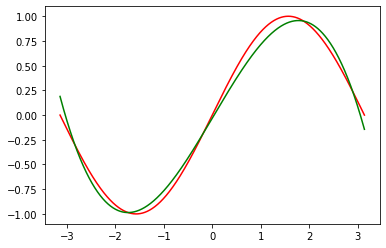

In [22]:
def predict_sin(x):
    return a+b*x+c*x**2+d*x**3

import matplotlib.pyplot as plt 
plt.plot(x,y,c='r')
plt.plot(x,predict_sin(x),c='g')
plt.show()

In [23]:
# 2 使用pytorch张量进行梯度下降

import torch
import math

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi,math.pi,2000,device=device,dtype=dtype)
y = torch.sin(x)

a = torch.randn((),device=device,dtype=dtype)
b = torch.randn((),device=device,dtype=dtype)
c = torch.randn((),device=device,dtype=dtype)
d = torch.randn((),device=device,dtype=dtype)

learning_rate = 1e-6

for t in range(2000):
    y_pred = a+b*x+c*x**2+d*x**3
    loss = (y_pred - y).pow(2).sum().item()

    if t % 100 ==99:
        print(t,loss)
    
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2079.260498046875
199 1468.034912109375
299 1037.5106201171875
399 734.1796264648438
499 520.4055786132812
599 369.7096252441406
699 263.45355224609375
799 188.51531982421875
899 135.653076171875
999 98.35609436035156
1099 72.0362319946289
1199 53.459503173828125
1299 40.345767974853516
1399 31.087013244628906
1499 24.54908561706543
1599 19.931785583496094
1699 16.670467376708984
1799 14.366645812988281
1899 12.739038467407227
1999 11.589033126831055
Result: y = -0.055228542536497116 + 0.8499048948287964 x + 0.009527843445539474 x^2 + -0.09235803782939911 x^3


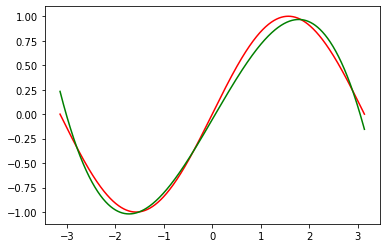

In [24]:
def predict_sin2(x):
    return a+b*x+c*x**2+d*x**3
import matplotlib.pyplot as plt 
plt.plot(x,y,c='r')
plt.plot(x,predict_sin2(x),c='g')
plt.show()

In [25]:
# 3 使用autograd自动梯度计算
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b*x +c*x**2+d*x**3
    loss = (y_pred-y).pow(2).sum()
    if t%100 ==99:
        print(t,loss.item())
    
    # 执行自动梯度计算
    loss.backward()

    # 进行梯度下降
    with torch.no_grad():
        a -= learning_rate*a.grad 
        b -= learning_rate*b.grad 
        c -= learning_rate*c.grad 
        d -= learning_rate*d.grad 
        a.grad = None 
        b.grad = None
        c.grad = None 
        d.grad = None 

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


99 350.6225280761719
199 246.3155517578125
299 173.9889373779297
399 123.78739929199219
499 88.9103775024414
599 64.658447265625
699 47.779937744140625
799 36.023372650146484
899 27.827756881713867
999 22.110069274902344
1099 18.118133544921875
1199 15.329056739807129
1299 13.379064559936523
1399 12.014815330505371
1499 11.059768676757812
1599 10.390778541564941
1699 9.921894073486328
1799 9.5930814743042
1899 9.362378120422363
1999 9.200424194335938
Result: y = 0.019712112843990326 + 0.8508722186088562 x + -0.003400667803362012 x^2 + -0.0924956277012825 x^3


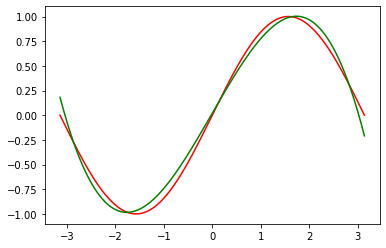

In [27]:

def predict_sin3(x):
    return a+b*x+c*x**2+d*x**3

import matplotlib.pyplot as plt 
plt.plot(x,y,c='r')
plt.plot(x,(predict_sin3(x).detach().numpy()),c='g')
plt.show()

In [33]:
# 4 重新定义autograd函数，执行梯度计算
# 将模型定义为y = a + b P[3](c + dx)而不是y = a + bx + cx ^ 2 + dx ^ 3，其中P[3](x) = 1/2 (5x ^ 3 - 3x)是三次的勒让德多项式。
import torch
import math 

class LegendrePolynomial3(torch.autograd.Function):
    @staticmethod 
    def forward(ctx,input):
        ctx.save_for_backward(input)
        return 0.5 * (5*input**3 -3*input)

    @staticmethod 
    def backward(ctx,grad_output):
        input, = ctx.saved_tensors
        return grad_output*1.5*(5*input**2-1)
    

dtype = torch.float
device = torch.device("cpu") 

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.973188400268555
899 17.7457275390625
999 14.877889633178711
1099 12.931766510009766
1199 11.610918045043945
1299 10.714258193969727
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943639755249023
Result: y = -5.423830273798558e-09 + -2.208526849746704 * P3(1.3320399228078372e-09 + 0.2554861009120941 x)


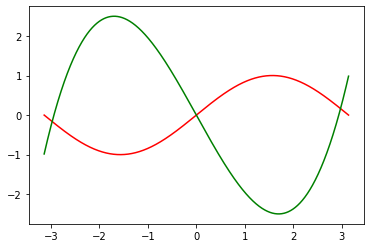

In [34]:

def predict_sin4(x):
    return a+b*x+c*x**2+d*x**3
import matplotlib.pyplot as plt 
plt.plot(x,y,c='r')
plt.plot(x,(predict_sin4(x)).detach().numpy(),c='g')
plt.show()

In [85]:
# 5 nn 模块。封装计算过程层。构建计算图

import torch 
import math 

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1,2,3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(3,1),
    torch.nn.Flatten(0,1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6

for t in range(2000):
    y_pred = model(xx)

    loss = loss_fn(y_pred,y)
    if t%100 == 99:
        print(t,loss.item())
    
    model.zero_grad()

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    

linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')


99 1063.9005126953125
199 706.83837890625
299 470.62939453125
399 314.3643798828125
499 210.98336791992188
599 142.58665466308594
699 97.33384704589844
799 67.39220428466797
899 47.580684661865234
999 34.47142028808594
1099 25.796506881713867
1199 20.05570411682129
1299 16.25637435913086
1399 13.741846084594727
1499 12.0775146484375
1599 10.975820541381836
1699 10.246527671813965
1799 9.763702392578125
1899 9.444038391113281
1999 9.232373237609863
Result: y = 0.003426064969971776 + 0.837184488773346 x + -0.000591053394600749 x^2 + -0.09054866433143616 x^3


[[ 8.3718449e-01 -5.9105339e-04 -9.0548664e-02]]
0.837184488773346


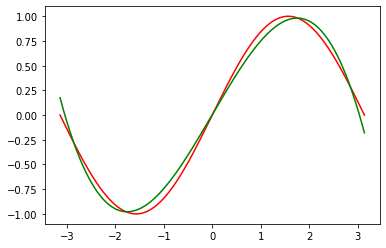

In [86]:
print(linear_layer.weight.detach().numpy())
print((linear_layer.weight[0,0]).item())
def predict_sin5(x):
    return linear_layer.bias.item()+x*linear_layer.weight[0,0].item()+x**2 * linear_layer.weight[0,1].item() + x**3 * linear_layer.weight[0,2].item()

# print(predict_sin5(2))
import matplotlib.pyplot as plt 
plt.plot(x,y,c='r')
plt.plot(x,predict_sin5(x),c='g')
plt.show()

In [87]:
# 6 使用optimizer自动下降计算
import torch
import math

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')


99 494.2001953125
199 222.24923706054688
299 131.94528198242188
399 73.64026641845703
499 37.08171844482422
599 18.956501007080078
699 10.892595291137695
799 9.057557106018066
899 8.854501724243164
999 8.906543731689453
1099 8.938582420349121
1199 8.902544975280762
1299 8.896836280822754
1399 8.908731460571289
1499 8.911303520202637
1599 8.907160758972168
1699 8.908832550048828
1799 8.916685104370117
1899 8.927263259887695
1999 8.922130584716797
Result: y = -0.0005175599944777787 + 0.8562414050102234 x + -0.0005175702390260994 x^2 + -0.09382987022399902 x^3


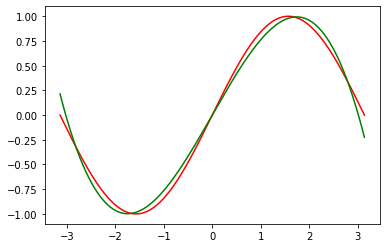

In [88]:
def predict_sin6(x):
    return linear_layer.bias.item()+x*linear_layer.weight[0,0].item()+x**2 * linear_layer.weight[0,1].item() + x**3 * linear_layer.weight[0,2].item()

# print(predict_sin5(2))
import matplotlib.pyplot as plt 
plt.plot(x,y,c='r')
plt.plot(x,predict_sin6(x),c='g')
plt.show()

In [90]:
# 7 自定义nn模块。进行forward、backward、optimizer
import torch
import math 

class Polynomial3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
    
    def forward(self,x):
        return self.a+self.b*x+self.c*x**2+self.d*x**3
    
    def string(self):
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = Polynomial3()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(),lr=1e-6)

for t in range(2000):
    y_pred = model(x)
    loss = criterion(y_pred,y)
    if t % 100 == 99:
        print(t,loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(model.string())

# 主要实现了在不同等级上的抽象。本层通过model构建了神经网络模型实现了前向传播、自动梯度计算。使用torch.nn.MSELoss计算了损失。使用了torch.optim.SGD进行梯度下降。 

99 560.31494140625
199 382.79241943359375
299 262.6877746582031
399 181.34494018554688
499 126.19588470458984
599 88.7654037475586
699 63.33283615112305
799 46.033226013183594
899 34.252540588378906
999 26.221017837524414
1099 20.73921775817871
1199 16.993431091308594
1299 14.430941581726074
1399 12.675918579101562
1499 11.472537994384766
1599 10.646467208862305
1699 10.07874870300293
1799 9.688159942626953
1899 9.41912841796875
1999 9.233620643615723
y = 0.01773737370967865 + 0.8454191088676453 x + -0.0030599930323660374 x^2 + -0.09171997010707855 x^3


In [91]:
# 8 控制流和权限共享

# -*- coding: utf-8 -*-
import random
import torch
import math

class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    # 这里的d,e的样本值是随机的，表示这两个参数锁对应的样本值对模型不会产生正向影响。所以最终结果应该是0
    # 这个实验也说明了，可以在正向和反向传播的任何波分添加任何控制流。甚至可以跳过。也就是说，构建普通神经网络，不需要像构建卷积神经网络那样，以层为单位构建。而是单纯的构建神经元和计算图。
    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

# 主要是用来控制封装好的过程。模型中参数可以自己定义。使用库中的函数，函数的参数会自动参加训练。使用自己的函数，就需要声明自己的参数。

1999 33.18156814575195
3999 20.196273803710938
5999 14.039202690124512
7999 11.19318675994873
9999 10.00029468536377
11999 9.34005355834961
13999 9.059755325317383
15999 8.731332778930664
17999 8.888145446777344
19999 8.854000091552734
21999 8.832571029663086
23999 8.844922065734863
25999 8.65311336517334
27999 8.838438034057617
29999 8.85017204284668
Result: y = -4.497888221521862e-05 + 0.8571422100067139 x + -0.0005409775767475367 x^2 + -0.09365808218717575 x^3 + 0.00013697342365048826 x^4 ? + 0.00013697342365048826 x^5 ?


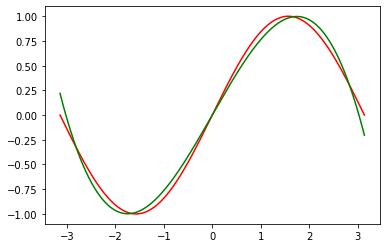

In [95]:
def predict_sin8(x):
    return model.a.item()+x*model.b.item()+x**2 * model.c.item() + x**3 * model.d.item()+x**4 *model.e.item()

# print(predict_sin5(2))
import matplotlib.pyplot as plt 
plt.plot(x,y,c='r')
plt.plot(x,predict_sin8(x),c='g')
plt.show()